<KeysViewHDF5 ['coords', 'disp', 'network', 'station', 'time']>


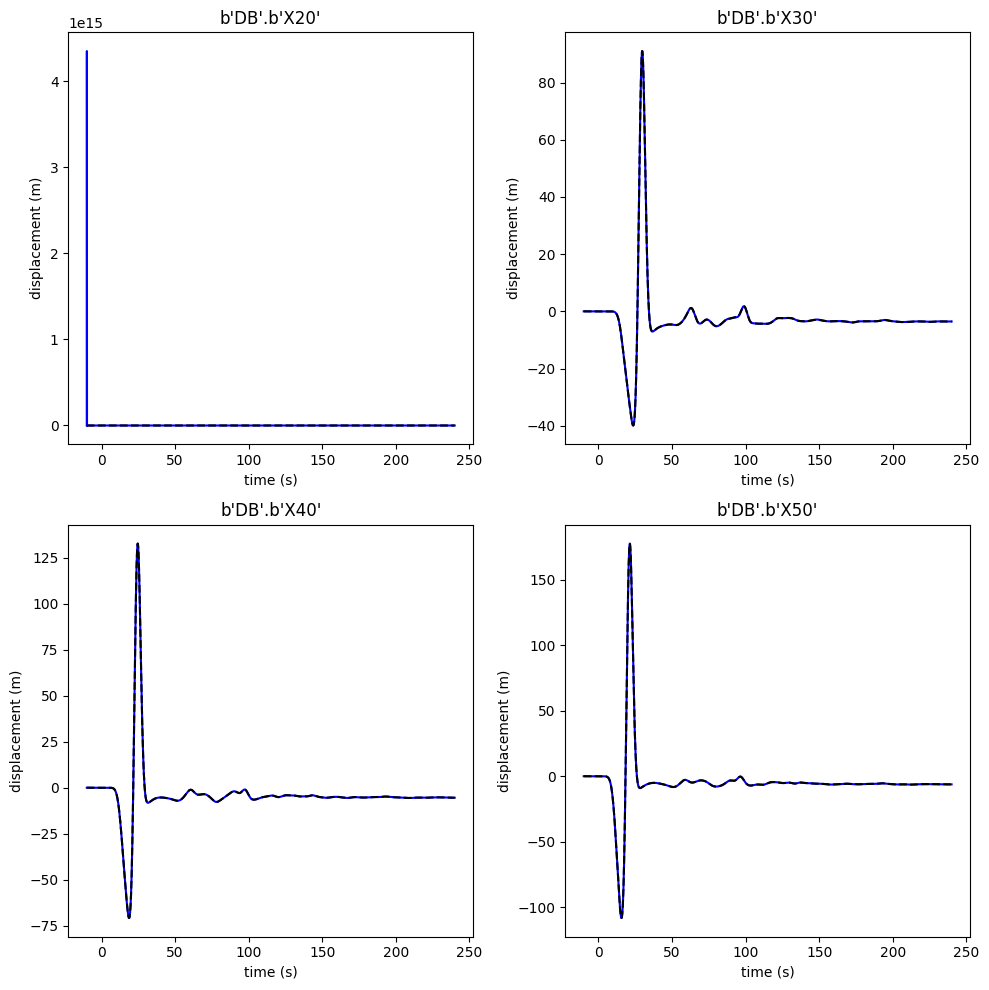

In [21]:
# read and plot the seismograms in hdf5 format

import h5py

fseis = "OUTPUT_FILES/seismograms.h5"


# open 
with h5py.File(fseis, "r") as f:

    # contents
    # coords                   Dataset {3, 4}
    # disp                     Dataset {4, 5000, 3}
    # network                  Dataset {4}
    # station                  Dataset {4}
    # time                     Dataset {5000}
    print(f.keys())

    # load data
    network = f["network"][:]
    station = f["station"][:]
    coords = f["coords"][:]
    time = f["time"][:]
    disp = f["disp"][:]

# read reference seismograms
import numpy as np
fx20= np.loadtxt("./REF_SEIS/DB.X20.BXY.semd")
fx30= np.loadtxt("./REF_SEIS/DB.X30.BXY.semd")
fx40= np.loadtxt("./REF_SEIS/DB.X40.BXY.semd")
fx50= np.loadtxt("./REF_SEIS/DB.X50.BXY.semd")

fx_ref = np.array([fx20, fx30, fx40, fx50])

# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# plot z component
for i in range(4):
    ax[i // 2, i % 2].plot(time, disp[i, :, 1], "b")
    ax[i // 2, i % 2].plot(fx_ref[i][:, 0], fx_ref[i][:, 1], "k--")

    ax[i // 2, i % 2].set_title("{}.{}".format(network[i], station[i]))
    ax[i // 2, i % 2].set_xlabel("time (s)")
    ax[i // 2, i % 2].set_ylabel("displacement (m)")


plt.tight_layout()
plt.show()

In [12]:
disp.shape

(5000, 3)